# DX 602 Final Project

## Introduction

In this project, you will practice the skills that you have learned throughout this module with a heavy focus on building models.
Most of the problems and questions are open ended compared to your previous homeworks, and you will be asked to explain your choices.
Most of them will have a particular type of solution implied, but it is up to you to figure out the details based on what you have learned in this module.

## Instructions

Each problem asks you to perform build models, run a computation, or otherwise perform some analysis of the data, and usually answer some questions about the results.
Make sure that your question answers are well supported by your analysis and explanations; simply stating an answer without support will earn minimal points.

Notebook cells for code and text have been added for your convenience, but feel free to add additional cells.

## Example Code

You may find it helpful to refer to this GitHub repository of Jupyter notebooks for example code.

* https://github.com/bu-cds-omds/dx601-examples
* https://github.com/bu-cds-omds/dx602-examples

Any calculations demonstrated in code examples or videos may be found in these notebooks, and you are allowed to copy this example code in your homework answers.

## Submission

This project will be entirely manually graded.
However, we may rerun some or all of your code to confirm that it works as described.

### Late Policy

The normal homework late policy for OMDS does not apply to this project.
Boston University requires final grades to be submitted within 72 hours of class instruction ending, so we cannot accommodate 5 days of late submissions.

However, we have delayed the due date of this project to be substantially later than necessary given its scope, and given you more days for submission with full credit than you would have had days for submission with partial credit under the homework late policy.
The Thanksgiving holiday was also taken into account in setting the deadline.
Finally, the deadlines for DX 601 and DX 602 were coordinated to be a week apart while giving ample time for both of their projects.

## Shared Imports

For this project, you are forbidden to use modules that were not loaded in this template.
While other modules are handy in practice, modules that trivialize these problems interfere with our assessment of your own knowledge and skills.

If you believe a module covered in the course material (not live sessions) is missing, please check with your learning facilitator.

In [38]:
import math
import sys

In [39]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats
import sklearn.linear_model

## Problems

### Problem 1 (5 points)

Pick one of the following data sets to analyze in this project.
Load the data set, and show a random sample of 10 rows.

* [Wine Quality](https://archive.ics.uci.edu/dataset/186/wine+quality) ([PMLB - red subset only](https://github.com/EpistasisLab/pmlb/tree/master/datasets/wine_quality_red))
* [Body Fat](https://www.openml.org/search?type=data&status=active&id=560) ([PMLB](https://github.com/EpistasisLab/pmlb/tree/master/datasets/560_bodyfat))

The PMLB copies of the data are generally cleaner and recommended for this project, but the other links are provided to give you more context.
To load the data from the PMLB Github repository, navigate to the `.tsv.gz` file in GitHub and copy the link from the "Raw" button.

If the dataset has missing data, you should drop the rows with missing data before proceeding.
If the data set you choose has more than ten columns, you may limit later analysis that is requested per column to just the first ten columns.

In [40]:
red_wine_df = pd.read_csv("https://github.com/EpistasisLab/pmlb/raw/refs/heads/master/datasets/wine_quality_red/wine_quality_red.tsv.gz", sep="\t")
red_wine_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  target                1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [41]:
print("No Need to drop any data as there is no non-null columns")

No Need to drop any data as there is no non-null columns


In [42]:
red_wine_df.sample(10, random_state=42)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,target
803,7.7,0.56,0.08,2.50,0.114,14.0,46.0,0.99710,3.24,0.66,9.6,6
124,7.8,0.50,0.17,1.60,0.082,21.0,102.0,0.99600,3.39,0.48,9.5,5
350,10.7,0.67,0.22,2.70,0.107,17.0,34.0,1.00040,3.28,0.98,9.9,6
682,8.5,0.46,0.31,2.25,0.078,32.0,58.0,0.99800,3.33,0.54,9.8,5
1326,6.7,0.46,0.24,1.70,0.077,18.0,34.0,0.99480,3.39,0.60,10.6,6
976,7.2,0.41,0.30,2.10,0.083,35.0,72.0,0.99700,3.44,0.52,9.4,5
1493,7.7,0.54,0.26,1.90,0.089,23.0,147.0,0.99636,3.26,0.59,9.7,5
706,7.0,0.78,0.08,2.00,0.093,10.0,19.0,0.99560,3.40,0.47,10.0,5
613,8.2,0.39,0.38,1.50,0.058,10.0,29.0,0.99620,3.26,0.74,9.8,5
1587,5.8,0.61,0.11,1.80,0.066,18.0,28.0,0.99483,3.55,0.66,10.9,6


YOUR ANSWERS HERE

### Problem 2 (10 points)

List all of the columns and describe them in your own words.

In [43]:
red_wine_df_columns = red_wine_df.columns
print("Red Wine Columns : ", red_wine_df_columns.to_list(), "\n")
col_desc_dict = {"fixed acidity" : "Amount of non-volatile acids in the wine, measured in (g/L)",
"volatile acidity" : "Amount of gaseous acids, measured in (g/L)", 
"citric acid" : "Amount of citric acid in the wine, measured in (g/L)",
"residual sugar" : "Amount of sugar remaining after fermentation, measured in (g/L)",
"chlorides" : "Amount of salt in the wine, measured in (g/L)",
"free sulfur dioxide" : "Unbound form of SO2 acting as preservative, measured in (mg/L)",
"total sulfur dioxide" : "Total amount of free and bound forms of SO2 in the wine, measured in (mg/L)",
"density" : "mass per unit volume of the wine, measured in (g/cm3)",
"pH" : "Measure of the wine's acidity or basicity on the pH scale (0-14)",
"sulphates" : "Concentration of sulfur dioxide salts, measured in (g/L)",
"alcohol" : "Percentage of alcohol content in the wine, measured in (%vol)",
"target" : "Target variable, to measure the quality score of the wine on a scale of 3 to 8"}
for column in red_wine_df_columns:
    print(f"{column} : ", col_desc_dict.get(column), "\n")

Red Wine Columns :  ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'target'] 

fixed acidity :  Amount of non-volatile acids in the wine, measured in (g/L) 

volatile acidity :  Amount of gaseous acids, measured in (g/L) 

citric acid :  Amount of citric acid in the wine, measured in (g/L) 

residual sugar :  Amount of sugar remaining after fermentation, measured in (g/L) 

chlorides :  Amount of salt in the wine, measured in (g/L) 

free sulfur dioxide :  Unbound form of SO2 acting as preservative, measured in (mg/L) 

total sulfur dioxide :  Total amount of free and bound forms of SO2 in the wine, measured in (mg/L) 

density :  mass per unit volume of the wine, measured in (g/cm3) 

pH :  Measure of the wine's acidity or basicity on the pH scale (0-14) 

sulphates :  Concentration of sulfur dioxide salts, measured in (g/L) 

alcohol :  Percentage of alcohol co

In [44]:
print("Descriptive Statistics of the Red Wine Dataset", "\n")
print(red_wine_df.describe().T)

Descriptive Statistics of the Red Wine Dataset 

                       count       mean        std      min      25%  \
fixed acidity         1599.0   8.319637   1.741096  4.60000   7.1000   
volatile acidity      1599.0   0.527821   0.179060  0.12000   0.3900   
citric acid           1599.0   0.270976   0.194801  0.00000   0.0900   
residual sugar        1599.0   2.538806   1.409928  0.90000   1.9000   
chlorides             1599.0   0.087467   0.047065  0.01200   0.0700   
free sulfur dioxide   1599.0  15.874922  10.460157  1.00000   7.0000   
total sulfur dioxide  1599.0  46.467792  32.895324  6.00000  22.0000   
density               1599.0   0.996747   0.001887  0.99007   0.9956   
pH                    1599.0   3.311113   0.154386  2.74000   3.2100   
sulphates             1599.0   0.658149   0.169507  0.33000   0.5500   
alcohol               1599.0  10.422983   1.065668  8.40000   9.5000   
target                1599.0   5.636023   0.807569  3.00000   5.0000   

              

YOUR ANSWERS HERE

### Problem 3 (50 points)

Perform an exploratory analysis of the data set.
After your exploratory analysis, pick 3 individual charts that you the think were particularly interesting.
Repeat those charts separately from your original analysis, and after each of those charts, explain what you thought was noteworthy.

In [45]:
# YOUR CODE HERE

YOUR ANSWERS HERE

### Problem 4 (5 points)

Plot the correlation matrix of the numeric columns in the data set.
Which pair of different columns were highlighted as the most correlated?

In [46]:
# YOUR CODE HERE

YOUR ANSWERS HERE

### Problem 5 (10 points)

Pick three different regression model classes to try in problem 6 from the scikit-learn documentation.
For each class, provide a link to the scikit-learn documentation, and a link to another web page describing how that kind of model works.
The second link should not be from scikit-learn, but Wikipedia is acceptable.
You do not need to understand the methods at this time, but it is good to be comfortable researching them.

In [59]:
...


Ellipsis

YOUR ANSWERS HERE

### Problem 6 (50 points)

Build three different regression models using the entire data set.
Plot the actual target vs the predicted values for each in one chart.
Compute the L2 and L1 losses for each of them.
You may use any regression class provided provided by scikit-learn, and you may reuse one class as long as you change its parameters enough to see different results.

In [67]:
def mean_squared_error(model_name, target, predictions):
    error = target-predictions
    error_squared = error * error
    l2_loss = np.mean(error_squared)
    print(f"L2 loss for model {model_name} : {l2_loss}")


def mean_abs_error(model_name, target, predictions):
    error = target-predictions
    l1_loss = np.mean(np.abs(error))
    print(f"L1 loss for model {model_name} : {l1_loss}")


def model_evaluation(model, model_name, features, target):
    model.fit(X=features, y=target)
    r2_score = model.score(X=features, y=target)
    predictions = model.predict(X=features)

    mean_squared_error(model_name, target, predictions)
    mean_abs_error(model_name, target, predictions)

    plt.scatter(target, predictions, color="green")
    plt.title(f"{model_name} Actual vs Predictions (R^2) = {r2_score:.2f}")
    plt.xlabel("Actual")
    plt.ylabel("Predictions")
    plt.show()

In [61]:
red_wine_df_features = red_wine_df.drop("target", axis=1)
red_wine_df_target = red_wine_df["target"]

L2 loss for model Linear Regression : 0.41676716722140794
L1 loss for model Linear Regression : 0.5004899635644883


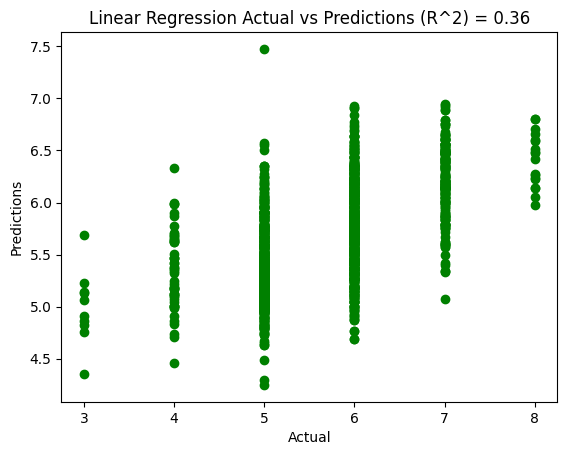

In [68]:
linear_regression = sklearn.linear_model.LinearRegression()
model_evaluation(linear_regression, "Linear Regression",
                 red_wine_df_features, red_wine_df_target)

L2 loss for model Ridge : 0.41746575596828844
L1 loss for model Ridge : 0.5012320051944336


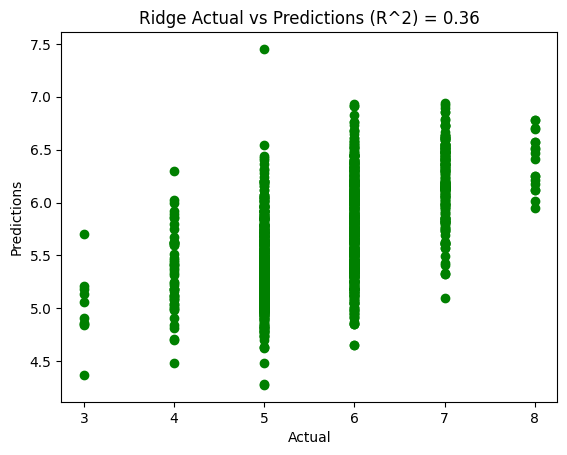

In [69]:
ridge = sklearn.linear_model.Ridge()
model_evaluation(ridge, "Ridge",
                 red_wine_df_features, red_wine_df_target)

L2 loss for model Lasso : 0.4957470811620323
L1 loss for model Lasso : 0.5561757897408898


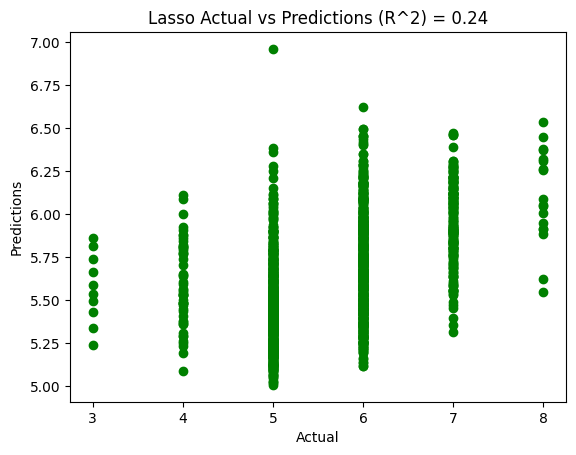

In [70]:
model_lasso = sklearn.linear_model.Lasso(alpha=0.1)
model_evaluation(model_lasso, "Lasso",
                 red_wine_df_features, red_wine_df_target)

YOUR ANSWERS HERE

### Problem 7 (30 points)

Use 5-fold cross-validation to repeat building the same three kinds of regression models. Compare the L2 losses predicted by cross-validation against the L2 losses training against the whole data set. (The difference is likely from overfitting in the latter.)

In [49]:
# YOUR CODE HERE

YOUR ANSWERS HERE

### Problem 8 (25 points)

Build three different regression models as in problem 6, but preprocess the data so that each column has mean zero and standard deviation one first.
For full credit, use a scikit-learn pipeline for each model.
For each model, compare the L2 losses -- which of them performed differently from your results in problem 6?

(This process will be covered in week 13.)

In [50]:
# YOUR CODE HERE

YOUR ANSWERS HERE

### Problem 9 (5 points)

A colleague suggests that you find better models by repeatedly building decision trees with random depth limits.
They say that trying 1000 such models will likely find an improvement as long as you use cross validation.
Give a one sentence response to this suggestion. 

In [51]:
# YOUR CODE HERE

YOUR ANSWERS HERE

### Problem 10 (10 points)

Pick a best model from all the models that you built and otherwise described in this project.
Explain how you picked it, including what criteria you chose, and how the other models compared by that criteria.
As much as possible, justify that problem in the context of the original data set. 

In [52]:
# YOUR CODE HERE

YOUR ANSWERS HERE